In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 파일 로드 

df = pd.read_csv('bank-full.csv', sep=';')
original_df = df.copy()

In [3]:
# 데이터 레이아웃 확인 

print(df.shape)                     # instance, feature
print(df.isnull().sum().sum())      # missing values 확인
# print(df.describe())              # numeric value 통계값 확인
df.head()

(45211, 17)
0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 데이터 전처리 
1. binary feuture :  0,1 전환 
2. nominal featue : 숫자형태로 표현된 명목형 변수 타입 전환, dummy variable 변환
3. numeric feature : scaling 

#### 1. y, house, loan, default 의 yes, no를 binary 0,1 값으로 변경

In [4]:
# 전환 함수 정의

def convert_to_int(df, new_column, target_column):
    df[new_column] = df[target_column].apply(lambda x: 0 if x == 'no' else 1)
    df[target_column] = df[new_column]
    df.drop([new_column], axis=1,inplace = True)
    return print(df[target_column].value_counts())

In [5]:
convert_to_int(df, "y_int", "y")  
convert_to_int(df, "housing_int", "housing") 
convert_to_int(df, "loan_int", "loan")            
convert_to_int(df, "default_int", "default")  

df.head()

0    39922
1     5289
Name: y, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
0    44396
1      815
Name: default, dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


#### 2. nominal feature 전처리

In [6]:
# feature value = unknown 제거

df['job'] = np.where(df['job'] == "unknown", float('nan'), df['job'])
df['education'] = np.where(df['education'] == "unknown", float('nan'), df['education'])
df = df.dropna()

In [7]:
# age, day of week 을 numeric -> nominal로 전환 (값의 크기는 의미 없다고 판단)

df['day'] = df['day'].astype(str)  

lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60

df['age_category'] = df['age_category'].astype(np.int64)
df['age_category'] = df['age_category'].astype(str)
df['age'] = df['age_category']
df.drop(['age_category'], axis=1,inplace = True)
df.dtypes

age          object
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,50,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,40,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,30,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,30,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,20,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0


In [9]:
# dummy variable 전환
df2 = pd.get_dummies(df)
print(df2.shape)  # feature 갯수 증가 17 -> 81

df2.head()

(43193, 81)


,default,balance,housing,loan,duration,campaign,pdays,previous,y,age_20,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,2143,1,0,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,29,1,0,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,2,1,1,76,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,231,1,0,139,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0,447,1,1,217,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


#### 3. numeric value scaling

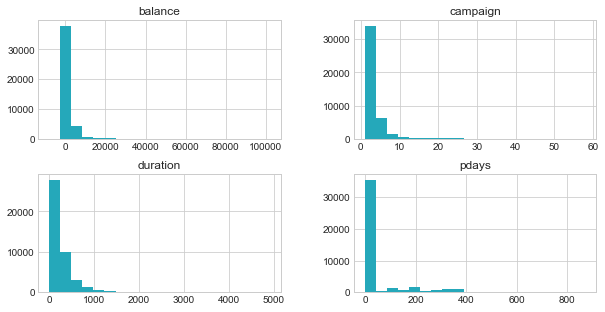

In [10]:
# distribution 확인 -> 제외해야할 이상치는 특별히 없다고 판단
plt.style.use('seaborn-whitegrid')

df2.hist(column=['balance','duration','campaign','pdays'], bins=20, figsize=(10,5), layout=(2,2), color='#25A8BA')
plt.show()

In [11]:
# 특정 변수의 값이 지나치게 큰 값으로 되어, 계산에 영향을 주지 않도록 모든 변수의 범위를 -1 ~ 1 사이로 normalization 한다.

from sklearn.preprocessing import MinMaxScaler
nc = MinMaxScaler()

# scaling 하기 위해 데이터타입 int64 -> float64로 변경 
df2['balance'] = df2['balance'].astype(np.float64)
df2['campaign'] = df2['campaign'].astype(np.float64)
df2['duration'] = df2['duration'].astype(np.float64)
df2['pdays'] = df2['pdays'].astype(np.float64)

# -1 ~ 1 사이로 minmax scaling 
df2['balance'] = nc.fit_transform(df2['balance'].values.reshape(-1,1))
df2['campaign'] = nc.fit_transform(df2['campaign'].values.reshape(-1,1))
df2['duration'] = nc.fit_transform(df2['duration'].values.reshape(-1,1))
df2['pdays'] = nc.fit_transform(df2['pdays'].values.reshape(-1,1))

df2.head()

,default,balance,housing,loan,duration,campaign,pdays,previous,y,age_20,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0.092259,1,0,0.053070,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0.073067,1,0,0.030704,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0.072822,1,1,0.015453,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,0.074901,1,0,0.028264,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0,0.076862,1,1,0.044124,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### 상관관계 파악
- 유의한 상관관계를 갖는 feature는 없는 것으로 확인됨

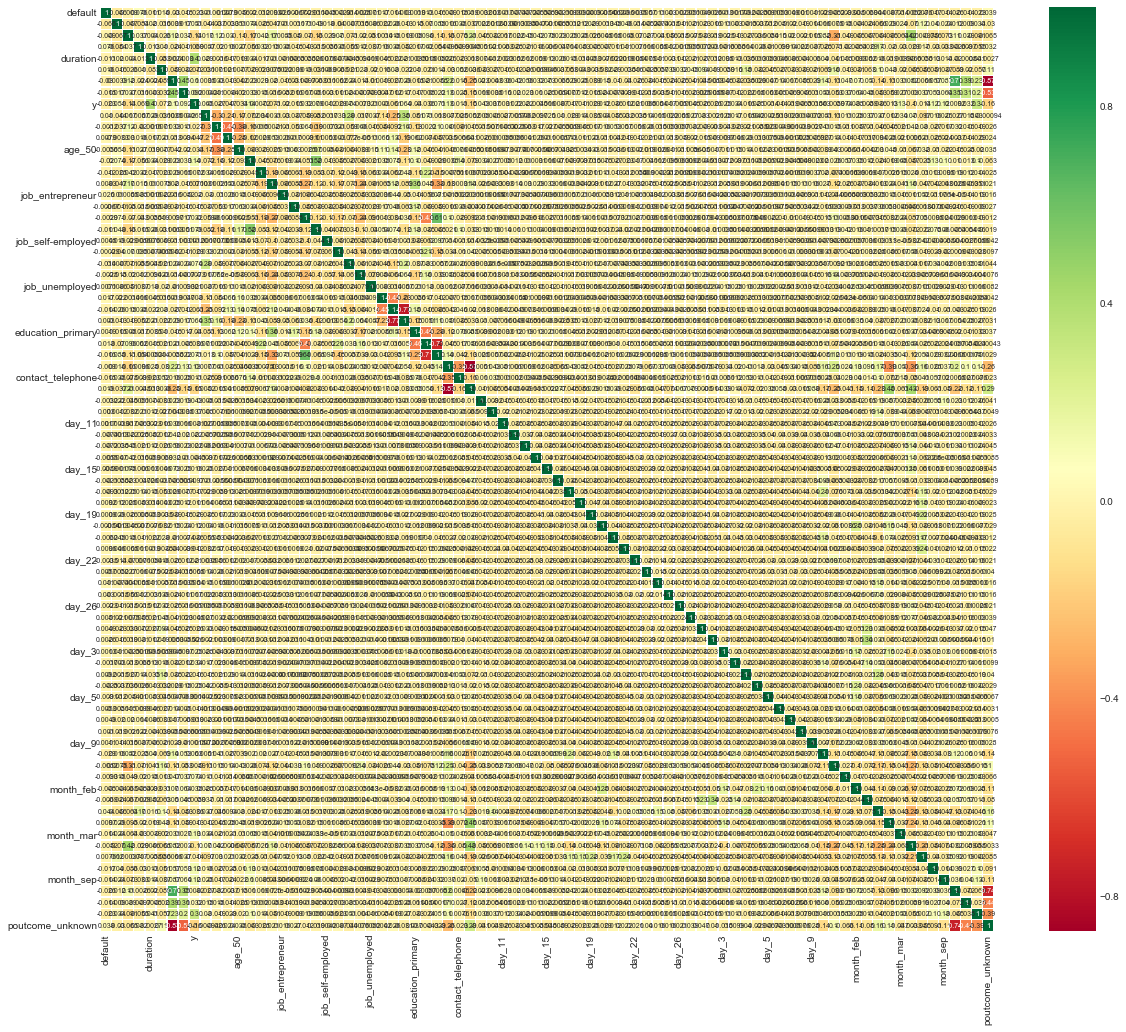

In [12]:
# 데이터 전처리 후 (81개 feature 간)
corr = df2.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':7})
fig=plt.gcf()
fig.set_size_inches(20,17)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 데이터셋 분리 
- training 70%, test 30%

In [12]:
# Classification 기준값인 'y'를 맨 뒤로 옮긴다(target variable 분리하기 위함)
df2['target_value'] = df2['y']
df2.drop(labels=['y'], axis=1,inplace = True)
df2.head()

,default,balance,housing,loan,duration,campaign,pdays,previous,age_20,age_30,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,target_value
0,0,0.092259,1,0,0.053070,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0.073067,1,0,0.030704,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0.072822,1,1,0.015453,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5,0,0.074901,1,0,0.028264,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6,0,0.076862,1,1,0.044124,0.0,0.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.3, random_state=42)

### 모델 탐색

- 데이터 특성 : positive value  11% 수준의 unbalanced data

* positive value ratio: 0.11624568795869701


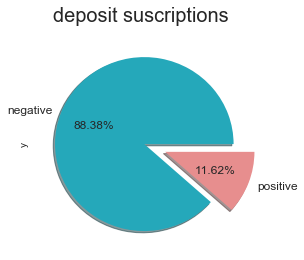

In [14]:
print("* positive value ratio:", df['y'].value_counts()[1]/df2.shape[0])

f = plt.subplots(figsize=(4,4))

colors = ["#25A8BA", "#E78E8E"]
labels ="negative", "positive"

plt.suptitle('deposit suscriptions', fontsize=20)

df['y'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                labels=labels, fontsize=12)

#### 0. baseline accuracy 
- unbalanced dataset 으로 기본 accuracy 높음
- 분석 목적 : '성공확률이 높은 고객 추출' & '성공확률이 낮은 고객을 제외하여 비용 절감' 이므로 TP rate(=recall) 이 중요하다고 판단 
- 기본 baseline accuracy 가 높아 추가적인 성능평가지표로 
  f1-score / kappa / auprc 이용 

- kappa : 우연히 예측해서 맞출 확률을 배제했을 때 모델 성능이 개선된 정도
- roc curve : senstivity와 specificity를 고려 -> FP를 줄이면서, TP를 높이는 것이 목표
- prc curve : precision과 recall을 고려 -> TN의 영향도를 무시하면서 TP를 높이는 것이 목표로 TN이 차지하는 비율이 높을 때 이용 
- auprc : prc curve 아래 영역의 넓이 (area under prescison-recall curve)

In [15]:
# 성능평가 함수 정의 

from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve,recall_score, f1_score, cohen_kappa_score,auc, precision_score
    
def model_evaluation(model) : 
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("confusion matrix :")
    print(confusion_matrix(y_test, y_pred))
    print("")
    print("score :", model.score(X_test,y_test))
    print("")
    print(classification_report(y_test,y_pred,digits=4))
    
    print("kappa :", cohen_kappa_score(y_test, y_pred))
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred, pos_label=1)

    print("auprc :", auc(recall, precision, reorder=True))
    plt.figure(figsize=(2,2))
    plt.plot(recall, precision)   

confusion matrix :
[[11445     0]
 [ 1513     0]]

score : 0.8832381540361167

             precision    recall  f1-score   support

          0     0.8832    1.0000    0.9380     11445
          1     0.0000    0.0000    0.0000      1513

avg / total     0.7801    0.8832    0.8285     12958

kappa : 0.0
auprc : 0.5583809229819416


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


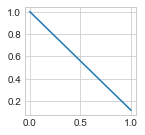

In [16]:
# baseline (가장 많은 class로 무조건 예측하는 경우)
from sklearn.dummy import DummyClassifier

du = DummyClassifier(strategy='most_frequent', constant=None)
du.fit(X_train, y_train)   
model_evaluation(du)

#### 1. logistic regression

confusion matrix :
[[9793 1652]
 [ 273 1240]]

score : 0.8514431239388794

             precision    recall  f1-score   support

          0     0.9729    0.8557    0.9105     11445
          1     0.4288    0.8196    0.5630      1513

avg / total     0.9093    0.8514    0.8699     12958

kappa : 0.4838657067365921
auprc : 0.6347004323043103


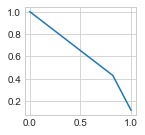

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=42)
gcv_lr = GridSearchCV(lr, param_grid={'max_iter' : [100,1000,10000]}, cv=3)

model_evaluation(gcv_lr)

#### 2. decision tree

confusion matrix :
[[11186   259]
 [ 1011   502]]

score : 0.9019910480012348

             precision    recall  f1-score   support

          0     0.9171    0.9774    0.9463     11445
          1     0.6597    0.3318    0.4415      1513

avg / total     0.8871    0.9020    0.8873     12958

kappa : 0.39416734962453215
auprc : 0.5347353936453838


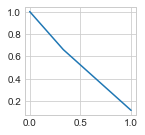

In [18]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=42)
gcv_dt = GridSearchCV(dt, param_grid= {'class_weight' : [None, 'balanced']
                                      , 'min_samples_split' : [2,5,10]
                                      , 'max_depth':[x for x in range(5,20)]}, cv=3)
model_evaluation(gcv_dt)

#### 3. random forest

confusion matrix :
[[10473   972]
 [  447  1066]]

score : 0.8904923599320883

             precision    recall  f1-score   support

          0     0.9591    0.9151    0.9366     11445
          1     0.5231    0.7046    0.6004      1513

avg / total     0.9082    0.8905    0.8973     12958

kappa : 0.5385483979042771
auprc : 0.6310591827010615


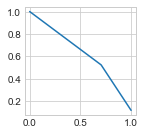

In [19]:
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier(class_weight='balanced', random_state=42)
gcv_Rforest = GridSearchCV(Rforest, param_grid= {'n_estimators': [10, 50, 100]
                                                 , 'min_samples_split': [5,10]
                                                 , 'max_depth':[x for x in range(5,20)]}, cv=3)
model_evaluation(gcv_Rforest)

#### 4. mlp

confusion matrix :
[[10841   604]
 [  801   712]]

score : 0.8915727735761692

             precision    recall  f1-score   support

          0     0.9312    0.9472    0.9391     11445
          1     0.5410    0.4706    0.5034      1513

avg / total     0.8856    0.8916    0.8883     12958

kappa : 0.44283238634781297
auprc : 0.5367183824333147


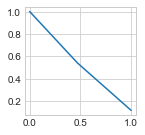

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

gcv_mlp = GridSearchCV(mlp, param_grid= {'activation' : ['logistic', 'tanh', 'relu']
                                         , 'learning_rate_init' : [0.1, 0.01, 0.001]
                                         , 'max_iter' : [1000,2000]}, cv=3) 
model_evaluation(gcv_mlp)

### model 성능 비교 
- positive class에 대해 recall 을 가장 향상시킨 모델은 logistic regression -> 가능한 마케팅 타겟을 많이 추출하고자 할때 
- precision과 recall을 동시에 고려했을 때 우수한 모델 random forest -> 마케팅 실패로 인한 비용 낭비를 최소화하면서 마케팅 대상을 최대한 추출하고자 할때

#### random forest 성능 개선

In [21]:
gcv_Rforest.best_params_

{'max_depth': 19, 'min_samples_split': 5, 'n_estimators': 100}

- 이전 fitting 결과 best parameter : estimator 및 max_depth가 클수록 성능 우수 
- 과적합을 위해 min_sample_split=5로 고정하고 grid search 재 수행

confusion matrix :
[[11013   432]
 [  808   705]]

score : 0.9043062200956937

             precision    recall  f1-score   support

          0     0.9316    0.9623    0.9467     11445
          1     0.6201    0.4660    0.5321      1513

avg / total     0.8953    0.9043    0.8983     12958

kappa : 0.4799712526366475
auprc : 0.5741848688788738


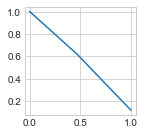

In [29]:
Rforest_adv = RandomForestClassifier(class_weight='balanced', random_state=42, min_samples_split=5)
gcv_Rforest_adv = GridSearchCV(Rforest_adv, param_grid= {'n_estimators': [100,150,200]
                                                        , 'max_depth':[20,40,60]
                                                        , 'max_features' : [None, 'auto', 'log2']}, cv=3)
model_evaluation(gcv_Rforest_adv)

- parameter 조정만으로는 성능 개선이 이루어지지 않아 undersampling 수행 
- class 의 불균형을 해결하고 training함으로써 성능 개선 유도 
- positive instance는 그대로 유지하고, negative instance를 random sampling 하여 1:1 비율로 조정 

In [30]:
number_pos = len(df2[df2.target_value == 1])

pos = np.array(df2[df2.target_value == 1].index)
neg = df2[df2.target_value == 0].index

neg_sample = np.random.choice(neg, number_pos, replace = False)
neg_sample = np.array(neg_sample)

In [32]:
sample = np.concatenate([pos,neg_sample])
sample_data = df2.loc[sample,:]

In [38]:
sample_data.shape

(10042, 81)

In [52]:
X_train_samp, X_test_samp, y_train_samp, y_test_samp = train_test_split(sample_data.iloc[:,:-1]
                                                                        , sample_data.iloc[:,-1]
                                                                        , test_size=0.3, random_state=42)


In [40]:
X_train_samp = sample_data.iloc[:,:-1]
y_train_samp = sample_data.iloc[:,-1]

confusion matrix :
[[1195  274]
 [ 186 1358]]

score : 0.8473282442748091

             precision    recall  f1-score   support

          0     0.8653    0.8135    0.8386      1469
          1     0.8321    0.8795    0.8552      1544

avg / total     0.8483    0.8473    0.8471      3013

kappa : 0.6940219954115883
auprc : 0.8866870072130457


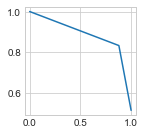

In [56]:
# under sampling set 으로 training 후 기존 동일한 test set 으로 성능평가 

gcv_Rforest_adv.fit(X_train_samp, y_train_samp)
y_pred_samp = gcv_Rforest_adv.predict(X_test_samp)

print("confusion matrix :")
print(confusion_matrix(y_test_samp, y_pred_samp))
print("")
print("score :", gcv_Rforest_adv.score(X_test_samp,y_test_samp))
print("")
print(classification_report(y_test_samp,y_pred_samp,digits=4))
    
print("kappa :", cohen_kappa_score(y_test_samp, y_pred_samp))
    
precision, recall, thresholds = precision_recall_curve(y_test_samp,y_pred_samp, pos_label=1)

print("auprc :", auc(recall, precision, reorder=True))
plt.figure(figsize=(2,2))
plt.plot(recall, precision)   

- positive value 에 대한 recall과 precision 동시에 개선